In [1]:
# Download the data
!wget https://s3.amazonaws.com/ps.public.resources/ml-showcase/news_summary.csv
!wget https://s3.amazonaws.com/ps.public.resources/ml-showcase/news_summary_more.csv

--2021-11-27 23:16:50--  https://s3.amazonaws.com/ps.public.resources/ml-showcase/news_summary.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.206.93
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.206.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11896415 (11M) [text/csv]
Saving to: ‘news_summary.csv’

news_summary.csv    100%[===================>]  11.34M  10.1MB/s    in 1.1s    

2021-11-27 23:16:52 (10.1 MB/s) - ‘news_summary.csv’ saved [11896415/11896415]

--2021-11-27 23:16:52--  https://s3.amazonaws.com/ps.public.resources/ml-showcase/news_summary_more.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.105.214
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.105.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41399270 (39M) [text/csv]
Saving to: ‘news_summary_more.csv’

news_summary_more.c 100%[===================>]  39.48M  23.1MB/s    in 1.7s    

2021-11-27 23:16:54 (23.1 MB/s) 

In [2]:
# Install necessary libraries
# Note: You may need to restart your kernel!
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
!pip install pandas
!pip3 install sklearn

     |████████████████████████████████| 1.7 MB 15.2 MB/s 
     |████████████████████████████████| 952 kB 61.3 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 6.0 MB 12.9 MB/s            
     |████████████████████████████████| 451 kB 74.9 MB/s            
     |████████████████████████████████| 10.1 MB 67.7 MB/s            
     |████████████████████████████████| 628 kB 78.7 MB/s            
     |████████████████████████████████| 42 kB 1.6 MB/s             
     |████████████████████████████████| 181 kB 82.1 MB/s            
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully un

In [3]:
import pandas as pd

summary = pd.read_csv('news_summary.csv', encoding='iso-8859-1')
raw = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [4]:
pre1 =  raw.iloc[:, 0:2].copy()
pre2 = summary.iloc[:, 0:6].copy()

# To increase the intake of possible text values to build a reliable model
pre2['text'] = pre2['author'].str.cat(pre2['date'].str.cat(pre2['read_more'].str.cat(pre2['text'].str.cat(pre2['ctext'], sep = " "), sep = " "),sep = " "), sep = " ")

pre = pd.DataFrame()
pre['text'] = pd.concat([pre1['text'], pre2['text']], ignore_index=True)
pre['summary'] = pd.concat([pre1['headlines'],pre2['headlines']], ignore_index = True)

In [5]:
pre.head(2)

,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...


In [6]:
import re

# Remove non-alphabetic characters (Data Cleaning)
def text_strip(column):
    
  for row in column:        
    row = re.sub("(\\t)", ' ', str(row)).lower() 
    row = re.sub("(\\r)", ' ', str(row)).lower() 
    row = re.sub("(\\n)", ' ', str(row)).lower()
    
    # Remove _ if it occurs more than one time consecutively
    row = re.sub("(__+)", ' ', str(row)).lower()   
    
    # Remove - if it occurs more than one time consecutively
    row = re.sub("(--+)", ' ', str(row)).lower()
    
    # Remove ~ if it occurs more than one time consecutively
    row = re.sub("(~~+)", ' ', str(row)).lower()   
    
    # Remove + if it occurs more than one time consecutively
    row = re.sub("(\+\++)", ' ', str(row)).lower()

    # Remove . if it occurs more than one time consecutively
    row = re.sub("(\.\.+)", ' ', str(row)).lower()   
    
    # Remove the characters - <>()|&©ø"',;?~*!
    row = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() 
    
    # Remove mailto:
    row = re.sub("(mailto:)", ' ', str(row)).lower() 
    
    # Remove \x9* in text
    row = re.sub(r"(\\x9\d)", ' ', str(row)).lower() 
    
    # Replace INC nums to INC_NUM
    row = re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() 
    
    # Replace CM# and CHG# to CM_NUM
    row = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() 
    
    # Remove punctuations at the end of a word 
    row = re.sub("(\.\s+)", ' ', str(row)).lower() 
    row = re.sub("(\-\s+)", ' ', str(row)).lower() 
    row = re.sub("(\:\s+)", ' ', str(row)).lower() 
            
    # Replace any url to only the domain name
    try:
      url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
      repl_url = url.group(3)
      row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
    except:
      pass 
    
    # Remove multiple spaces
    row = re.sub("(\s+)",' ',str(row)).lower() 
    
    # Remove the single character hanging between any two spaces
    row = re.sub("(\s+.\s+)", ' ', str(row)).lower() 
    
    yield row

In [7]:
processed_text = text_strip(pre['text'])
processed_summary = text_strip(pre['summary'])

In [8]:
import spacy
from time import time

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) 

# Process text as batches and yield Doc objects in order
text = [str(doc) for doc in nlp.pipe(processed_text, batch_size=5000)]

summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(processed_summary, batch_size=5000)]

In [10]:
text[0]

'saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgrad 360-degree career support helped him transition to data scientist at tech mahindra with 90% salary hike upgrad online power learning has powered lakh+ careers.'

In [11]:
summary[0]

'_START_ upgrad learner switches to career in ml al with 90% salary hike _END_'

In [12]:
pre['cleaned_text'] = pd.Series(text)
pre['cleaned_summary'] = pd.Series(summary)

In [13]:
text_count = []
summary_count = []

In [14]:
for sent in pre['cleaned_text']:
    text_count.append(len(sent.split()))
    
for sent in pre['cleaned_summary']:
    summary_count.append(len(sent.split()))

In [15]:
graph_df = pd.DataFrame() 

graph_df['text'] = text_count
graph_df['summary'] = summary_count

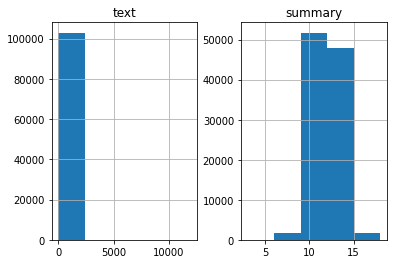

In [16]:
import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

In [17]:
# Check how much % of text have 0-100 words
cnt = 0
for i in pre['cleaned_text']:
    if len(i.split()) <= 100:
        cnt = cnt + 1
print(cnt / len(pre['cleaned_text']))

0.9578389933440218


In [18]:
# Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len = 100
max_summary_len = 15

In [19]:
# Select the Summaries and Text which fall below max length 
import numpy as np

cleaned_text = np.array(pre['cleaned_text'])
cleaned_summary= np.array(pre['cleaned_summary'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if len(cleaned_summary[i].split()) <= max_summary_len and len(cleaned_text[i].split()) <= max_text_len:
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre = pd.DataFrame({'text': short_text,'summary': short_summary})

In [20]:
post_pre.head(2)

,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg...,_START_ upgrad learner switches to career in m...
1,kunal shah credit card bill payment platform c...,_START_ delhi techie wins free food from swigg...


In [21]:
# Add sostok and eostok at the start and end of the summary
post_pre['summary'] = post_pre['summary'].apply(lambda x: 'sostok ' + x + ' eostok')

In [22]:
post_pre.head(2)

,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg...,sostok _START_ upgrad learner switches to care...
1,kunal shah credit card bill payment platform c...,sostok _START_ delhi techie wins free food fro...


In [23]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']), test_size=0.1, random_state=0, shuffle=True)

In [24]:
# Tokenize the text to get the vocab count 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [25]:
thresh = 5

cnt = 0
tot_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary: ",(cnt / tot_cnt) * 100)

% of rare words in vocabulary:  62.625791318822664


In [26]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

# Convert text sequences to integer sequences 
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

# Pad zero upto maximum length
x_tr = pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 29638


In [27]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [28]:
thresh = 5

cnt = 0
tot_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value < thresh:
        cnt = cnt + 1
    
print("% of rare words in vocabulary:",(cnt / tot_cnt) * 100)

% of rare words in vocabulary: 62.55667945587723


In [29]:
# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

# Convert text sequences to integer sequences 
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val) 

# Pad zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 12883


In [30]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []

for i in range(len(y_tr)):
    cnt = 0
    for j in y_tr[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_tr = np.delete(y_tr, ind, axis=0)
x_tr = np.delete(x_tr, ind, axis=0)

In [31]:
# Remove empty Summaries, .i.e, which only have 'START' and 'END' tokens
ind = []
for i in range(len(y_val)):
    cnt = 0
    for j in y_val[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_val = np.delete(y_val, ind, axis=0)
x_val = np.delete(x_val, ind, axis=0)

### Model Construction and Training

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

latent_dim = 300
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_text_len, ))

# Embedding layer
enc_emb =  Embedding(x_voc, embedding_dim, trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 200)     5927600     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 100, 300),   601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [33]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [34]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [35]:
# Note: this will take a while. Run as many epochs as needed.
history = model.fit([x_tr, y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:,1:], epochs=50, callbacks=[es], batch_size=128, validation_data=([x_val, y_val[:, :-1]], y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:,1:]))

Epoch 1/50
692/692 [==============================] - 816s 1s/step - loss: 5.1725 - val_loss: 4.8422
Epoch 2/50
692/692 [==============================] - 820s 1s/step - loss: 4.7342 - val_loss: 4.5182
Epoch 3/50
692/692 [==============================] - 826s 1s/step - loss: 4.4446 - val_loss: 4.2817
Epoch 4/50
692/692 [==============================] - 808s 1s/step - loss: 4.2202 - val_loss: 4.1021
Epoch 5/50
692/692 [==============================] - 807s 1s/step - loss: 4.0461 - val_loss: 3.9672
Epoch 6/50
692/692 [==============================] - 803s 1s/step - loss: 3.9113 - val_loss: 3.8664
Epoch 7/50
692/692 [==============================] - 810s 1s/step - loss: 3.7982 - val_loss: 3.7859
Epoch 8/50
692/692 [==============================] - 808s 1s/step - loss: 3.7016 - val_loss: 3.7201
Epoch 9/50
692/692 [==============================] - 814s 1s/step - loss: 3.6184 - val_loss: 3.6641
Epoch 10/50
692/692 [==============================] - 824s 1s/step - loss: 3.5460 - val_lo

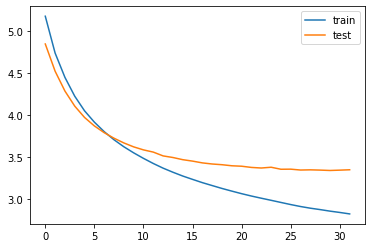

In [36]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [37]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [38]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs) 

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [39]:
def decode_sequence(input_seq):
    
  # Encode the input as state vectors.
  e_out, e_h, e_c = encoder_model.predict(input_seq)
  
  # Generate empty target sequence of length 1
  target_seq = np.zeros((1,1))
  
  # Populate the first word of target sequence with the start word.
  target_seq[0, 0] = target_word_index['sostok']

  stop_condition = False
  decoded_sentence = ''
  
  while not stop_condition:
    output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

    # Sample a token
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    sampled_token = reverse_target_word_index[sampled_token_index]
    
    if(sampled_token != 'eostok'):
        decoded_sentence += ' ' + sampled_token

    # Exit condition: either hit max length or find stop word.
    if (sampled_token == 'eostok' or len(decoded_sentence.split()) >= (max_summary_len - 1)):
        stop_condition = True

    # Update the target sequence (of length 1)
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = sampled_token_index

    # Update internal states
    e_h, e_c = h, c

  return decoded_sentence

In [40]:
# To convert sequence to summary
def seq2summary(input_seq):
  newString = ''
  for i in input_seq:
    if ((i != 0 and i != target_word_index['sostok']) and i!= target_word_index['eostok']):
      newString = newString + reverse_target_word_index[i] + ' '
          
  return newString

# To convert sequence to text
def seq2text(input_seq):
  newString = ''
  for i in input_seq:
    if i != 0:
      newString = newString + reverse_source_word_index[i] + ' '
          
  return newString

In [41]:
for i in range(0, 19):
  print("Review:", seq2text(x_tr[i]))
  print("Original summary:", seq2summary(y_tr[i]))
  print("Predicted summary:", decode_sequence(x_tr[i].reshape(1, max_text_len)))
  print("\n")

Review: lok janshakti party president ram vilas paswan daughter asha has said she will contest elections against him from constituency if given ticket from lalu prasad yadav rjd she accused him of neglecting her and promoting his son chirag asha is paswan daughter from his first wife while chirag is his son from his second wife 
Original summary: start will contest against father ram vilas from daughter end 
Predicted summary:  start will contest 2019 lok sabha polls rahul gandhi daughter end


Review: irish deputy prime minister frances fitzgerald announced her resignation on tuesday in bid to avoid the collapse of the government and potential snap election she quit hours before no confidence motion was to be proposed against her by the main opposition party the political crisis began over fitzgerald role in police whistleblower scandal 
Original summary: start irish deputy prime minister resigns to avoid govt collapse end 
Predicted summary:  start resigns after being resigns from pm

In [42]:
!mkdir -p saved_model
model.save('saved_model/seq2seq_baseline')

INFO:tensorflow:Assets written to: saved_model/seq2seq_baseline/assets
